# Emotion Classifier

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [4]:
data_table = pd.read_csv('output.csv')

In [5]:
print(data_table.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
R_avg        200 non-null float64
G_avg        200 non-null float64
B_avg        200 non-null float64
Color_var    200 non-null float64
V_var        200 non-null float64
S_var        200 non-null float64
label        200 non-null int64
dtypes: float64(6), int64(1)
memory usage: 11.1 KB
None


In [6]:
data_table.head(3)

,R_avg,G_avg,B_avg,Color_var,V_var,S_var,label
0,41.159902,6.339608,4.122353,8428.330322,24893.53975,0.379128,2
1,42.179304,32.587426,24.925267,14039.421230,26020.94546,0.228332,2
2,24.384406,13.276734,12.917357,10334.932620,18358.08420,0.259556,2


In [7]:
data_table.describe()

,R_avg,G_avg,B_avg,Color_var,V_var,S_var,label
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.00000
mean,25.080524,22.540344,20.703966,9859.722185,20039.446256,0.184246,1.50000
std,11.813719,11.524818,11.879637,4309.544786,6426.987452,0.149056,1.12084
min,2.075915,0.347061,0.235294,1223.068061,3593.486565,0.000000,0.00000
25%,15.483352,13.629974,11.171543,6683.981689,16210.235100,0.068065,0.75000
50%,24.243296,23.528233,19.776104,9629.385898,19641.660490,0.155312,1.50000
75%,35.099348,30.513464,29.760157,12716.311125,24776.507418,0.275042,2.25000
max,50.878914,46.909850,49.389196,21510.582700,38312.976830,0.600251,3.00000


In [8]:
X_features = data_table.iloc[:,:-1]
y_labels = data_table.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels, test_size=0.2, random_state=111)

In [9]:
X_train.head(3)

,R_avg,G_avg,B_avg,Color_var,V_var,S_var
193,14.147298,23.378985,21.207354,8891.972891,19370.73097,0.247073
26,31.944463,19.943042,17.643167,12232.824940,19765.44221,0.273746
15,21.955973,2.595209,4.138680,9014.038074,17412.89748,0.443652


In [10]:
y_train.head(5)

193    3
26     2
15     2
71     1
6      2
Name: label, dtype: int64

In [11]:
train_cnt = y_train.count()
test_cnt = y_test.count()
print('학습 세트 Shape:{0}, 테스트 세트 Shape:{1}'.format(X_train.shape, X_test.shape))

print('학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt)

print('\n 테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/test_cnt)

학습 세트 Shape:(160, 6), 테스트 세트 Shape:(40, 6)
학습 세트 레이블 값 분포 비율
0    0.26875
3    0.24375
2    0.24375
1    0.24375
Name: label, dtype: float64

 테스트 세트 레이블 값 분포 비율
3    0.275
2    0.275
1    0.275
0    0.175
Name: label, dtype: float64


## DecisionTree 분류기

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# DecisionTree 클래스 생성
dt_clf = DecisionTreeClassifier(random_state=11)

# DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

DecisionTreeClassifier 정확도 : 0.6250


In [13]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth': [2, 4, 6, 8, 10, 12],
                        'min_samples_split' : [2, 3, 4, 5],
                         'min_samples_leaf' : [1, 3, 5, 7, 9]}

grid_dclf = GridSearchCV(dt_clf, param_grid=parameters, scoring='accuracy', cv=5)
grid_dclf.fit(X_train, y_train)

print("GridSearch 최적 하이퍼 파라미터: ", grid_dclf.best_params_)
print("GridSearch 최고 정확도:{:.4f} ".format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

# GridSearch의 최적 하이퍼파라미터로 학습된 Estimator로 예측 및 평가 수행
predictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print('튜닝 후 예측 정확도: {0:.4f}'.format(accuracy))

GridSearch 최적 하이퍼 파라미터:  {'max_depth': 6, 'min_samples_leaf': 9, 'min_samples_split': 2}
GridSearch 최고 정확도:0.6625 
튜닝 후 예측 정확도: 0.7000


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

feature_importance_values = best_dclf.feature_importances_
# Top 중요도로 정렬하고, 쉽게 시각화하기 위해 Series 변환
feature_importances = pd.Series(feature_importance_values, index=X_train.columns)
# 중요도값 순으로 Series를 정렬
feature_top20 = feature_importances.sort_values(ascending=False)[:]

plt.figure(figsize=[8, 6])
plt.title('Decision Tree Feature Importances')
sns.barplot(x=feature_top20, y=feature_top20.index)
plt.show()

<Figure size 800x600 with 1 Axes>

## Random Forest 분류기

In [15]:
from sklearn.ensemble import RandomForestClassifier

In [16]:
rf_clf = RandomForestClassifier(random_state=11)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

랜덤 포레스트 정확도: 0.7250


In [17]:
params = {
    'n_estimators':[50,100,200],
    'max_depth' : [2,4,6,8],
    'min_samples_leaf' : [18,24,30],
    'min_samples_split' : [4, 8, 16, 20]
}
# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state=11, n_jobs=-11)
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=5, n_jobs=-1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터:\n',grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 2, 'min_samples_leaf': 18, 'min_samples_split': 4, 'n_estimators': 100}
최고 예측 정확도: 0.6750


In [18]:
best_rfclf = grid_cv.best_estimator_
best_rfclf.fit(X_train, y_train)
pred = best_rfclf.predict(X_test)
print('튜닝 후 예측 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

튜닝 후 예측 정확도: 0.8250


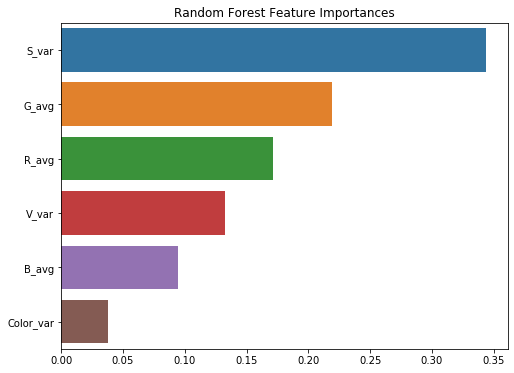

In [19]:
ftr_importances_values = best_rfclf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
ftr_top = ftr_importances.sort_values(ascending=False)[:]

plt.figure(figsize=[8, 6])
plt.title('Random Forest Feature Importances')
sns.barplot(x=ftr_top, y=ftr_top.index)
plt.show()

## Logistic Regression 분류기

In [20]:
from sklearn.linear_model import LogisticRegression
import numpy as np

In [21]:
lr_clf = LogisticRegression(random_state=11)
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('로지스틱 회귀 정확도: {0:.4f}'.format(accuracy))

로지스틱 회귀 정확도: 0.7000


In [22]:
# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = np.logspace(0, 4, 10)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

# Create grid search using 5-fold cross validation
best_lrclf = GridSearchCV(lr_clf, hyperparameters, cv=5, verbose=0)
best_model = best_lrclf.fit(X_train, y_train)
best_lrclf.fit(X_train, y_train)

print('최적 하이퍼 파라미터:\n',best_lrclf.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(best_lrclf.best_score_))

최적 하이퍼 파라미터:
 {'C': 7.742636826811269, 'penalty': 'l1'}
최고 예측 정확도: 0.7500


In [23]:
pred = best_model.predict(X_test)
print('튜닝 후 예측 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

pred = lr_clf.predict(X_test)
print('튜닝 전 예측 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

튜닝 후 예측 정확도: 0.7250
튜닝 전 예측 정확도: 0.7000


## 시간 영상 분석

In [24]:
pre_data = pd.read_csv('videooutput.csv')

In [25]:
print(pre_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 6 columns):
R_avg        13 non-null float64
G_avg        13 non-null float64
B_avg        13 non-null float64
Color_var    13 non-null float64
V_var        13 non-null float64
S_var        13 non-null float64
dtypes: float64(6)
memory usage: 752.0 bytes
None


In [26]:
pre_data.head(3)

,R_avg,G_avg,B_avg,Color_var,V_var,S_var
0,12.762579,11.013587,14.174673,7450.508234,10667.01593,0.059369
1,13.305754,13.121752,28.036241,4477.940885,15388.55038,0.189764
2,12.281548,17.934414,35.975109,6329.676119,21949.04848,0.255585


In [27]:
predictionc = best_rfclf.predict(pre_data)

In [28]:
print("예측: {}".format(predictionc))
print("예측 확률:\n{}".format(best_rfclf.predict_proba(pre_data[:len(predictionc)])))

예측: [1 2 2 3 3 1 3 3 0 0 0 3 3]
예측 확률:
[[0.0631093  0.57385731 0.20759826 0.15543513]
 [0.15327369 0.24431174 0.30914367 0.2932709 ]
 [0.22601762 0.18035648 0.32753676 0.26608914]
 [0.26350437 0.14571699 0.25399101 0.33678763]
 [0.14783405 0.26857877 0.26315981 0.32042738]
 [0.11696009 0.44893483 0.15613067 0.27797442]
 [0.27798221 0.1778181  0.1427261  0.40147358]
 [0.32667192 0.12256124 0.157236   0.39353084]
 [0.39945904 0.08978429 0.16808852 0.34266815]
 [0.40858081 0.08471309 0.17056692 0.33613917]
 [0.40858081 0.08471309 0.17056692 0.33613917]
 [0.35606465 0.09061282 0.168873   0.38444954]
 [0.31622085 0.09975901 0.17202488 0.41199526]]


[0.06310929791920775, 0.15327369067534652, 0.22601762330512495, 0.263504366792813, 0.14783404634528588, 0.1169600852713848, 0.2779822103974455, 0.3266719150281054, 0.39945903720757037, 0.40858081245674505, 0.40858081245674505, 0.35606464600560245, 0.3162208510261739]


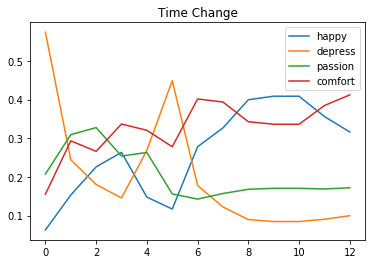

In [72]:
fig = plt.figure()
ax = plt.title('Time Change')

ax = fig.add_subplot(1,1,1)
percent = best_rfclf.predict_proba(pre_data[:len(predictionc)])
percent = percent.tolist()

new0 = []
new1 = []
new2 = []
new3 = []

for i in range(0,len(predictionc)):
    new0.append(percent[i][0])
    new1.append(percent[i][1])
    new2.append(percent[i][2])
    new3.append(percent[i][3])
print(new0)

ax.plot(new0,label='happy')
ax.plot(new1,label='depress')
ax.plot(new2,label='passion')
ax.plot(new3,label='comfort')
ax.legend()


## 봄 영상 분석

In [31]:
spring_data = pd.read_csv('spring_output.csv')

In [32]:
print(spring_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 6 columns):
R_avg        83 non-null float64
G_avg        83 non-null float64
B_avg        83 non-null float64
Color_var    83 non-null float64
V_var        83 non-null float64
S_var        83 non-null float64
dtypes: float64(6)
memory usage: 4.0 KB
None


In [33]:
spring_data.head(3)

,R_avg,G_avg,B_avg,Color_var,V_var,S_var
0,23.150356,23.581042,27.927677,10678.136430,21647.62073,0.098870
1,23.182724,23.609603,27.988057,10764.968970,21682.26974,0.099119
2,21.429791,22.158639,21.368061,6554.713531,18591.38189,0.216226


In [34]:
spring_prediction = best_rfclf.predict(spring_data)

In [35]:
print("예측: {}".format(spring_prediction))
print("예측 확률:\n{}".format(best_rfclf.predict_proba(pre_data[:len(spring_prediction)])))

예측: [3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 1 1]
예측 확률:
[[0.0631093  0.57385731 0.20759826 0.15543513]
 [0.15327369 0.24431174 0.30914367 0.2932709 ]
 [0.22601762 0.18035648 0.32753676 0.26608914]
 [0.26350437 0.14571699 0.25399101 0.33678763]
 [0.14783405 0.26857877 0.26315981 0.32042738]
 [0.11696009 0.44893483 0.15613067 0.27797442]
 [0.27798221 0.1778181  0.1427261  0.40147358]
 [0.32667192 0.12256124 0.157236   0.39353084]
 [0.39945904 0.08978429 0.16808852 0.34266815]
 [0.40858081 0.08471309 0.17056692 0.33613917]
 [0.40858081 0.08471309 0.17056692 0.33613917]
 [0.35606465 0.09061282 0.168873   0.38444954]
 [0.31622085 0.09975901 0.17202488 0.41199526]]


[0.2763270937309883, 0.268088097029749, 0.2619661906293836, 0.26455618630635575, 0.2663632038502154, 0.2663632038502154, 0.2663632038502154, 0.2663632038502154, 0.2663632038502154, 0.2663632038502154, 0.2663632038502154, 0.18657155852494395, 0.18657155852494395, 0.18657155852494395, 0.18657155852494395, 0.18657155852494395, 0.18657155852494395, 0.18657155852494395, 0.18657155852494395, 0.3053583928433803, 0.28565097613980805, 0.2887117176575627, 0.28232383886968393, 0.28039440241528957, 0.28039440241528957, 0.2852116986296953, 0.2598716872878978, 0.24043139463238652, 0.2614607731620923, 0.2585377142207127, 0.25322177646085303, 0.2589264938568686, 0.2631885688009716, 0.27142756550221087, 0.27577677185141725, 0.2616315437069152, 0.2750378044463863, 0.20774193783502629, 0.23952527525219874, 0.20206246886042134, 0.1931418552132396, 0.1935793552132396, 0.1935793552132396, 0.1935793552132396, 0.1935793552132396, 0.1935793552132396, 0.31660966696150966, 0.31660966696150966, 0.3409870088549805

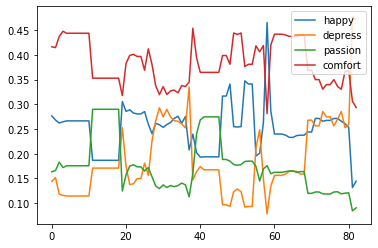

In [38]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
percent = best_rfclf.predict_proba(spring_data[:len(spring_prediction)])
percent = percent.tolist()

new0 = []
new1 = []
new2 = []
new3 = []

for i in range(0,len(spring_prediction)):
    new0.append(percent[i][0])
    new1.append(percent[i][1])
    new2.append(percent[i][2])
    new3.append(percent[i][3])
print(new0)
ax.plot(new0,label='happy')
ax.plot(new1,label='depress')
ax.plot(new2,label='passion')
ax.plot(new3,label='comfort')
ax.legend()

[26.648149191442695, 20.09013672780185, 20.52032708198307, 32.741386998772384]


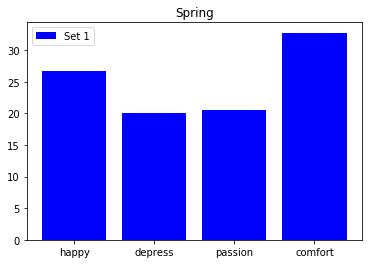

In [40]:
data_x = [sum(new0, 0.0)/len(new0)*100, sum(new1, 0.0)/len(new1)*100, sum(new2, 0.0)/len(new2)*100, sum(new3, 0.0)/len(new3)*100]
data_y = ['happy', 'depress', 'passion', 'comfort']
print(data_x)
plt.bar(data_y, data_x, label='Set 1', color='b')
plt.legend()
plt.title('Spring')
plt.show()

## 여름 영상 분석

In [41]:
summer_data = pd.read_csv('summer_output.csv')

In [42]:
print(summer_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 6 columns):
R_avg        23 non-null float64
G_avg        23 non-null float64
B_avg        23 non-null float64
Color_var    23 non-null float64
V_var        23 non-null float64
S_var        23 non-null float64
dtypes: float64(6)
memory usage: 1.2 KB
None


In [43]:
summer_data.head(3)

,R_avg,G_avg,B_avg,Color_var,V_var,S_var
0,24.970291,33.587436,32.276128,9598.620885,17338.83476,0.055217
1,25.061362,33.564568,32.309417,9712.796791,17213.27371,0.054684
2,24.893424,33.463976,32.177163,9536.346884,17034.35163,0.061316


In [44]:
summer_prediction = best_rfclf.predict(summer_data)

In [45]:
print("예측: {}".format(summer_prediction))
print("예측 확률:\n{}".format(best_rfclf.predict_proba(pre_data[:len(summer_prediction)])))

예측: [1 1 1 1 1 1 1 1 1 2 1 1 1 1 3 3 3 3 3 3 3 3 3]
예측 확률:
[[0.0631093  0.57385731 0.20759826 0.15543513]
 [0.15327369 0.24431174 0.30914367 0.2932709 ]
 [0.22601762 0.18035648 0.32753676 0.26608914]
 [0.26350437 0.14571699 0.25399101 0.33678763]
 [0.14783405 0.26857877 0.26315981 0.32042738]
 [0.11696009 0.44893483 0.15613067 0.27797442]
 [0.27798221 0.1778181  0.1427261  0.40147358]
 [0.32667192 0.12256124 0.157236   0.39353084]
 [0.39945904 0.08978429 0.16808852 0.34266815]
 [0.40858081 0.08471309 0.17056692 0.33613917]
 [0.40858081 0.08471309 0.17056692 0.33613917]
 [0.35606465 0.09061282 0.168873   0.38444954]
 [0.31622085 0.09975901 0.17202488 0.41199526]]


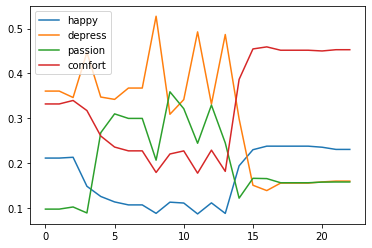

In [46]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
percent = best_rfclf.predict_proba(summer_data[:len(summer_prediction)])
percent = percent.tolist()

new0 = []
new1 = []
new2 = []
new3 = []

for i in range(0,len(summer_prediction)):
    new0.append(percent[i][0])
    new1.append(percent[i][1])
    new2.append(percent[i][2])
    new3.append(percent[i][3])

ax.plot(new0,label='happy')
ax.plot(new1,label='depress')
ax.plot(new2,label='passion')
ax.plot(new3,label='comfort')
ax.legend()

[16.947500071706838, 30.233585043174, 20.24524652037622, 32.57366836474294]


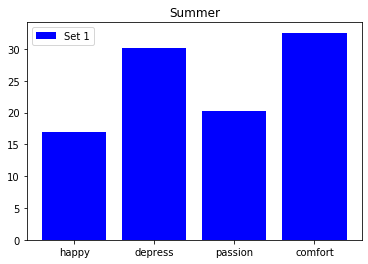

In [47]:
data_x = [sum(new0, 0.0)/len(new0)*100, sum(new1, 0.0)/len(new1)*100, sum(new2, 0.0)/len(new2)*100, sum(new3, 0.0)/len(new3)*100]
data_y = ['happy', 'depress', 'passion', 'comfort']
print(data_x)
plt.bar(data_y, data_x, label='Set 1', color='b')
plt.legend()
plt.title('Summer')
plt.show()

## 가을 영상 분석

In [48]:
autumn_data = pd.read_csv('authom_output.csv')

In [49]:
print(autumn_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 6 columns):
R_avg        21 non-null float64
G_avg        21 non-null float64
B_avg        21 non-null float64
Color_var    21 non-null float64
V_var        21 non-null float64
S_var        21 non-null float64
dtypes: float64(6)
memory usage: 1.1 KB
None


In [50]:
autumn_data.head(3)

,R_avg,G_avg,B_avg,Color_var,V_var,S_var
0,13.575712,12.885653,9.445046,16398.37914,17378.90080,0.167691
1,14.507763,13.727542,9.854545,15887.31630,17575.06629,0.163010
2,17.935147,13.398015,11.115087,11516.88271,15886.39272,0.144677


In [51]:
autumn_prediction = best_rfclf.predict(autumn_data)

In [52]:
print("예측: {}".format(autumn_prediction))
print("예측 확률:\n{}".format(best_rfclf.predict_proba(pre_data[:len(autumn_prediction)])))

예측: [2 2 2 2 2 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2]
예측 확률:
[[0.0631093  0.57385731 0.20759826 0.15543513]
 [0.15327369 0.24431174 0.30914367 0.2932709 ]
 [0.22601762 0.18035648 0.32753676 0.26608914]
 [0.26350437 0.14571699 0.25399101 0.33678763]
 [0.14783405 0.26857877 0.26315981 0.32042738]
 [0.11696009 0.44893483 0.15613067 0.27797442]
 [0.27798221 0.1778181  0.1427261  0.40147358]
 [0.32667192 0.12256124 0.157236   0.39353084]
 [0.39945904 0.08978429 0.16808852 0.34266815]
 [0.40858081 0.08471309 0.17056692 0.33613917]
 [0.40858081 0.08471309 0.17056692 0.33613917]
 [0.35606465 0.09061282 0.168873   0.38444954]
 [0.31622085 0.09975901 0.17202488 0.41199526]]


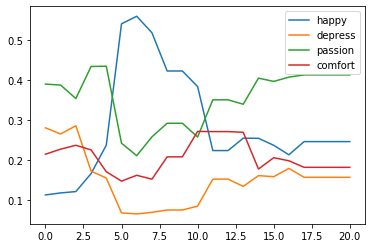

In [53]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
percent = best_rfclf.predict_proba(autumn_data[:len(autumn_prediction)])
percent = percent.tolist()

new0 = []
new1 = []
new2 = []
new3 = []

for i in range(0,len(autumn_prediction)):
    new0.append(percent[i][0])
    new1.append(percent[i][1])
    new2.append(percent[i][2])
    new3.append(percent[i][3])

ax.plot(new0,label='happy')
ax.plot(new1,label='depress')
ax.plot(new2,label='passion')
ax.plot(new3,label='comfort')
ax.legend()

[28.602301252155087, 15.09644086191074, 35.56341622669931, 20.737841659234846]


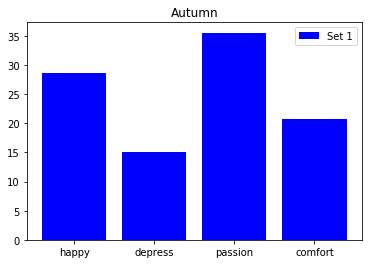

In [54]:
data_x = [sum(new0, 0.0)/len(new0)*100, sum(new1, 0.0)/len(new1)*100, sum(new2, 0.0)/len(new2)*100, sum(new3, 0.0)/len(new3)*100]
data_y = ['happy', 'depress', 'passion', 'comfort']
print(data_x)
plt.bar(data_y, data_x, label='Set 1', color='b')
plt.legend()
plt.title('Autumn')
plt.show()

## 겨울 영상 분석

In [55]:
winter_data = pd.read_csv('winter_output.csv')

In [56]:
print(winter_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 6 columns):
R_avg        16 non-null float64
G_avg        16 non-null float64
B_avg        16 non-null float64
Color_var    16 non-null float64
V_var        16 non-null float64
S_var        16 non-null float64
dtypes: float64(6)
memory usage: 896.0 bytes
None


In [57]:
winter_data.head(3)

,R_avg,G_avg,B_avg,Color_var,V_var,S_var
0,23.222616,24.269744,29.885051,5400.327213,16849.51115,0.034938
1,23.093696,24.456214,30.949795,4466.281727,17298.49238,0.044969
2,22.772475,24.740020,31.779693,3546.353275,16320.95370,0.058429


In [58]:
winter_prediction = best_rfclf.predict(winter_data)

In [59]:
print("예측: {}".format(winter_prediction))
print("예측 확률:\n{}".format(best_rfclf.predict_proba(pre_data[:len(winter_prediction)])))

예측: [1 1 1 3 3 3 3 3 3 3 3 3 3 3 3 1]
예측 확률:
[[0.0631093  0.57385731 0.20759826 0.15543513]
 [0.15327369 0.24431174 0.30914367 0.2932709 ]
 [0.22601762 0.18035648 0.32753676 0.26608914]
 [0.26350437 0.14571699 0.25399101 0.33678763]
 [0.14783405 0.26857877 0.26315981 0.32042738]
 [0.11696009 0.44893483 0.15613067 0.27797442]
 [0.27798221 0.1778181  0.1427261  0.40147358]
 [0.32667192 0.12256124 0.157236   0.39353084]
 [0.39945904 0.08978429 0.16808852 0.34266815]
 [0.40858081 0.08471309 0.17056692 0.33613917]
 [0.40858081 0.08471309 0.17056692 0.33613917]
 [0.35606465 0.09061282 0.168873   0.38444954]
 [0.31622085 0.09975901 0.17202488 0.41199526]]


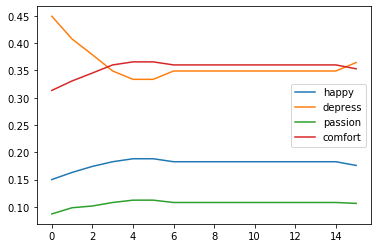

In [60]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
percent = best_rfclf.predict_proba(winter_data[:len(winter_prediction)])
percent = percent.tolist()

new0 = []
new1 = []
new2 = []
new3 = []

for i in range(0,len(winter_prediction)):
    new0.append(percent[i][0])
    new1.append(percent[i][1])
    new2.append(percent[i][2])
    new3.append(percent[i][3])

ax.plot(new0,label='happy')
ax.plot(new1,label='depress')
ax.plot(new2,label='passion')
ax.plot(new3,label='comfort')
ax.legend()

[17.926846553691625, 35.979304487362704, 10.628981152544632, 35.464867806401024]


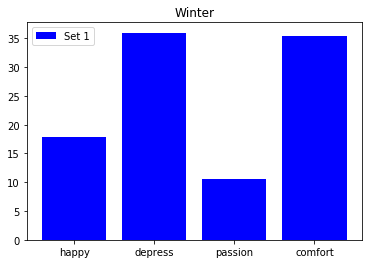

In [61]:
data_x = [sum(new0, 0.0)/len(new0)*100, sum(new1, 0.0)/len(new1)*100, sum(new2, 0.0)/len(new2)*100, sum(new3, 0.0)/len(new3)*100]
data_y = ['happy', 'depress', 'passion', 'comfort']
print(data_x)
plt.bar(data_y, data_x, label='Set 1', color='b')
plt.legend()
plt.title('Winter')
plt.show()